In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# 导入数据
from sklearn.datasets import load_wine
wine_data = load_wine()

df= pd.DataFrame(wine_data['data'],columns=wine_data['feature_names'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
df['target'] = wine_data['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Binary

In [4]:
sub_df = df[['alcohol','malic_acid','target']]
sub_df

,alcohol,malic_acid,target
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,0
...,...,...,...
173,13.71,5.65,2
174,13.40,3.91,2
175,13.27,4.28,2
176,13.17,2.59,2


In [5]:
sub_df = sub_df[sub_df['target'] <= 1]
sub_df['target'] = sub_df['target'] * 2 - 1
sub_df

/var/folders/hx/8khgcj1s74z7x4fqt7hss3qh0000gn/T/ipykernel_19680/927266932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['target'] = sub_df['target'] * 2 - 1


,alcohol,malic_acid,target
0,14.23,1.71,-1
1,13.20,1.78,-1
2,13.16,2.36,-1
3,14.37,1.95,-1
4,13.24,2.59,-1
...,...,...,...
125,12.07,2.16,1
126,12.43,1.53,1
127,11.79,2.13,1
128,12.37,1.63,1


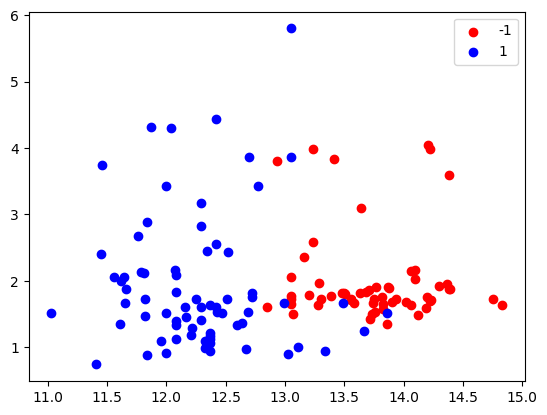

In [6]:
plt.figure()
X_type0 = sub_df[sub_df['target'] == -1].iloc[:,0:2]
X_type1 = sub_df[sub_df['target'] == 1].iloc[:,0:2]
plt.scatter(X_type0.iloc[:,0],X_type0.iloc[:,1],color='red',label=-1)
plt.scatter(X_type1.iloc[:,0],X_type1.iloc[:,1],color='blue',label=1)
plt.legend()
plt.show()

In [7]:
np.random.seed(42)
train = sub_df.sample(60)
train.index

Index([ 55,  40,  19,  31, 115,  56,  69, 105,  81,  26,  95,  27,  64,   4,
        97, 100,  36,  80,  93,  84,  18,  10, 120,  11, 126,  45,  70,  78,
        47,   0,  12,  42,  51,  24,  67, 113,  89,  15,  77,  22,  44,  65,
        96,  30,  62, 124,   9,  33,  66,  25, 117,  28,  98, 128,  53,   5,
        68,  73,  39,  49],
      dtype='int64')

In [8]:
train

,alcohol,malic_acid,target
55,13.56,1.73,-1
40,13.56,1.71,-1
19,13.64,3.10,-1
31,13.58,1.66,-1
115,11.03,1.51,1
56,14.22,1.70,-1
69,12.21,1.19,1
105,12.42,2.55,1
81,12.72,1.81,1
26,13.39,1.77,-1


In [9]:
test = sub_df.drop(train.index,axis=0)
test

,alcohol,malic_acid,target
1,13.20,1.78,-1
2,13.16,2.36,-1
3,14.37,1.95,-1
6,14.39,1.87,-1
7,14.06,2.15,-1
...,...,...,...
122,12.42,4.43,1
123,13.05,5.80,1
125,12.07,2.16,1
127,11.79,2.13,1


In [10]:
X_train = train.iloc[:,0:2]
y_train = train['target']

In [11]:
import myGpPackage.GP_Binary_Classifier as gbc

In [12]:
classifier = gbc.GP_Binary_Classifier()
classifier.load_data(X_train,y_train)
classifier.fit()

(array([-1.55782721, -1.53427549, -1.44181025, -1.51286214,  1.53452805,
        -2.11308535,  2.12045725,  0.89404749,  0.7238896 , -1.21174841,
         1.6135105 , -0.91533976,  2.11824042, -1.14278466,  1.98789094,
         1.82075593, -0.76000556,  2.11946676,  0.95065599,  2.07299739,
        -2.00565652, -2.32867299,  1.65808236, -1.86254636,  1.68742376,
        -0.87796679,  1.88401941,  1.97895015, -1.99885676, -2.11934575,
        -1.88588871, -2.17281617, -1.89365235, -1.51685296,  1.94062123,
         1.62837722,  2.21568405, -1.77795109,  1.32066598, -1.95400154,
        -0.2370708 ,  1.9343179 ,  1.95785531, -1.55389159, -1.04898915,
         0.54912684, -1.48869441, -1.64254492,  0.51775539, -0.49895333,
         1.65033095, -2.17100937,  1.94483064,  1.73264972, -2.06623416,
        -2.16834786,  0.084122  ,  0.06118312, -0.90730604, -2.08346866]),
 array([ -9.15742575,  -9.16156283,  -9.1785995 ,  -9.1653945 ,
         -9.16151804,  -9.08041555,  -9.07962323,  -9.3091

In [13]:
pred_train = classifier.predict_class(X_train)
np.mean(y_train == pred_train)

0.9833333333333333

In [14]:
X_test = test.iloc[:,0:2]
y_test = test['target']
pred_test = classifier.predict_class(X_test)
np.mean(y_test == pred_test)

0.9142857142857143